# Importing Libararies

In [218]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import classification_report

This cell is dedicated to importing all the necessary libraries. Any library that is used further in the project is imported in this cell.

# Loading Data

In [219]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


First we mount the drive, in which the directory `BreastData` containing dataset resides. Note that the folder name is changed to avoid ambiguity with previous project's folder.

In [220]:
data = pd.read_csv('/content/drive/MyDrive/BreastData/breast cancer.csv')

The whole csv is read and stored.

In [221]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Here we get a general overview of the data. There are 569 records and 33 attributes.

In [222]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The `Unnamed: 32` column is detected and removed.

# Data Preprocessing

In [223]:
train, test = train_test_split(data, test_size=0.2)

Data is splitted into train and test before any pre-processing to prevent data leakage.

In [224]:
train

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
15,84799002,M,14.540,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.07364,...,17.460,37.13,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410
135,868202,M,12.770,22.47,81.72,506.3,0.09055,0.05761,0.047110,0.02704,...,14.490,33.37,92.04,653.6,0.1419,0.1523,0.21770,0.09331,0.2829,0.08067
335,89742801,M,17.060,21.00,111.80,918.6,0.11190,0.10560,0.150800,0.09934,...,20.990,33.15,143.20,1362.0,0.1449,0.2053,0.39200,0.18270,0.2623,0.07599
370,9012315,M,16.350,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,...,19.380,31.03,129.30,1165.0,0.1415,0.4665,0.70870,0.22480,0.4824,0.09614
171,87163,M,13.430,19.63,85.84,565.4,0.09048,0.06288,0.058580,0.03438,...,17.980,29.87,116.60,993.6,0.1401,0.1546,0.26440,0.11600,0.2884,0.07371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,8610404,M,16.070,19.65,104.10,817.7,0.09168,0.08424,0.097690,0.06638,...,19.770,24.56,128.80,1223.0,0.1500,0.2045,0.28290,0.15200,0.2650,0.06387
226,88147101,B,10.440,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,...,11.520,19.80,73.47,395.4,0.1341,0.1153,0.02639,0.04464,0.2615,0.08269
478,911685,B,11.490,14.59,73.99,404.9,0.10460,0.08228,0.053080,0.01969,...,12.400,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180
507,91544002,B,11.060,17.12,71.25,366.5,0.11940,0.10710,0.040630,0.04268,...,11.690,20.74,76.08,411.1,0.1662,0.2031,0.12560,0.09514,0.2780,0.11680


Here we get an overview of train data.

In [225]:
train.shape

(455, 32)

Train data has 455 records.

In [226]:
test

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
509,915460,M,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,...,17.110,36.33,117.70,909.4,0.17320,0.49670,0.59110,0.21630,0.3013,0.10670
294,891716,B,12.720,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.019240,...,13.500,17.48,88.54,553.7,0.12980,0.14720,0.05233,0.06343,0.2369,0.06922
49,857156,B,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
251,88518501,B,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.020690,...,12.970,22.46,83.12,508.9,0.11830,0.10490,0.08105,0.06544,0.2740,0.06487
549,923465,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.008160,...,13.030,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,9013579,B,13.460,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.011170,...,14.690,35.63,97.11,680.6,0.11080,0.14570,0.07934,0.05781,0.2694,0.07061
451,9111805,M,19.590,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.090630,...,21.440,30.96,139.80,1421.0,0.15280,0.18450,0.39770,0.14660,0.2293,0.06091
77,8610637,M,18.050,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.108000,...,22.390,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080
59,858477,B,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,...,9.507,15.40,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026


Here we get an overview of test data.

In [227]:
test.shape

(114, 32)

Test data has 114 records.

In [228]:
train.head(100)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
15,84799002,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,...,17.46,37.13,124.10,943.2,0.16780,0.6577,0.70260,0.17120,0.4218,0.13410
135,868202,M,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,...,14.49,33.37,92.04,653.6,0.14190,0.1523,0.21770,0.09331,0.2829,0.08067
335,89742801,M,17.06,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,...,20.99,33.15,143.20,1362.0,0.14490,0.2053,0.39200,0.18270,0.2623,0.07599
370,9012315,M,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,...,19.38,31.03,129.30,1165.0,0.14150,0.4665,0.70870,0.22480,0.4824,0.09614
171,87163,M,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,...,17.98,29.87,116.60,993.6,0.14010,0.1546,0.26440,0.11600,0.2884,0.07371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,864685,B,11.93,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.02008,...,13.67,26.15,87.54,583.0,0.15000,0.2399,0.15030,0.07247,0.2438,0.08541
230,881972,M,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,...,19.59,24.89,133.50,1189.0,0.17030,0.3934,0.50180,0.25430,0.3109,0.09061
397,90401602,B,12.80,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.19010,0.08296,0.1988,0.07053
76,8610629,B,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,...,14.08,12.49,91.36,605.5,0.14510,0.1379,0.08539,0.07407,0.2710,0.07191


No missing values can be seen in the data.

In [229]:
train.replace('?', np.nan, inplace=True)
test.replace('?', np.nan, inplace=True)

We want to make sure there are no missing values depicted by ?.

<Axes: >

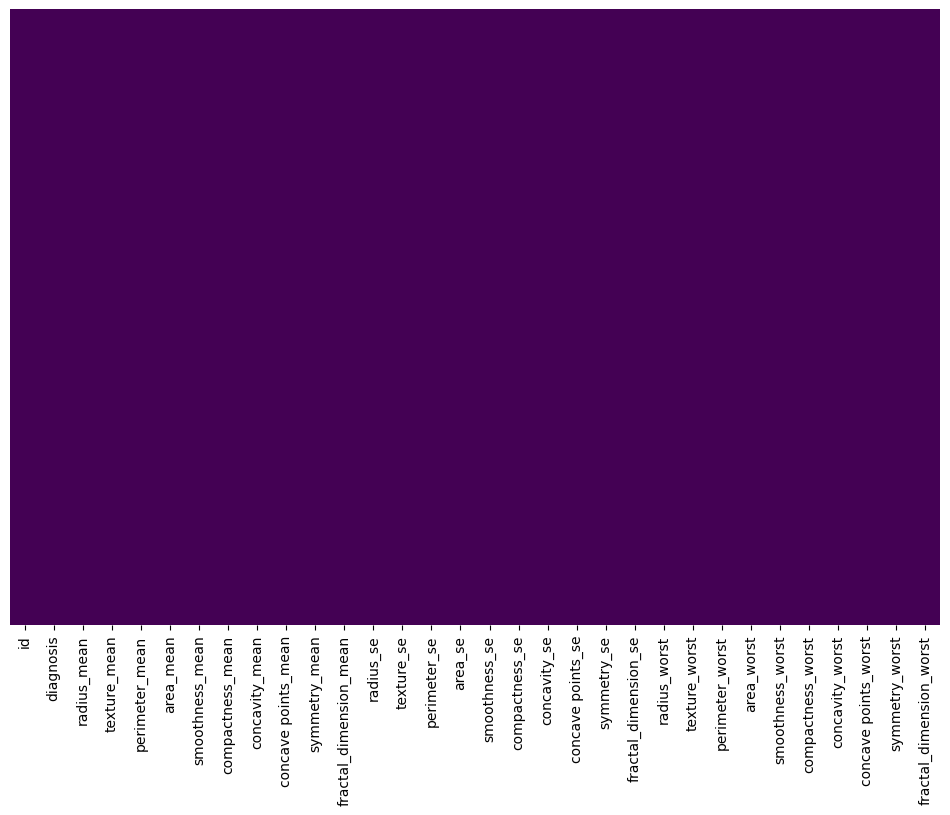

In [230]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As is shown above, there are no missing values.

In [231]:
train.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Here we check the attribute types and make sure they are all correct.

In [232]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

We notice that `id` is redundant as it contributes no useful information for further use. Hence it is dropped.

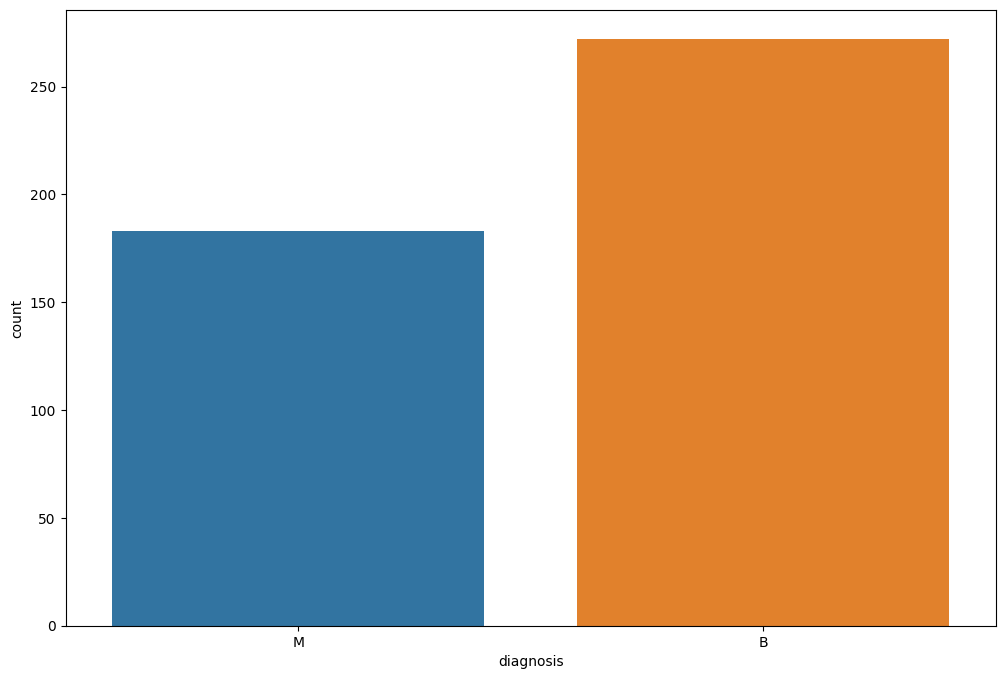

In [233]:
# drawing bar countplots for all categorical attributes
for column in train.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=f'{column}', data=train)
    plt.show()

The only categorical feature is `diagnosis` and is plotted. We can see a good balance here.

<ipython-input-234-1ffe726fbe40>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


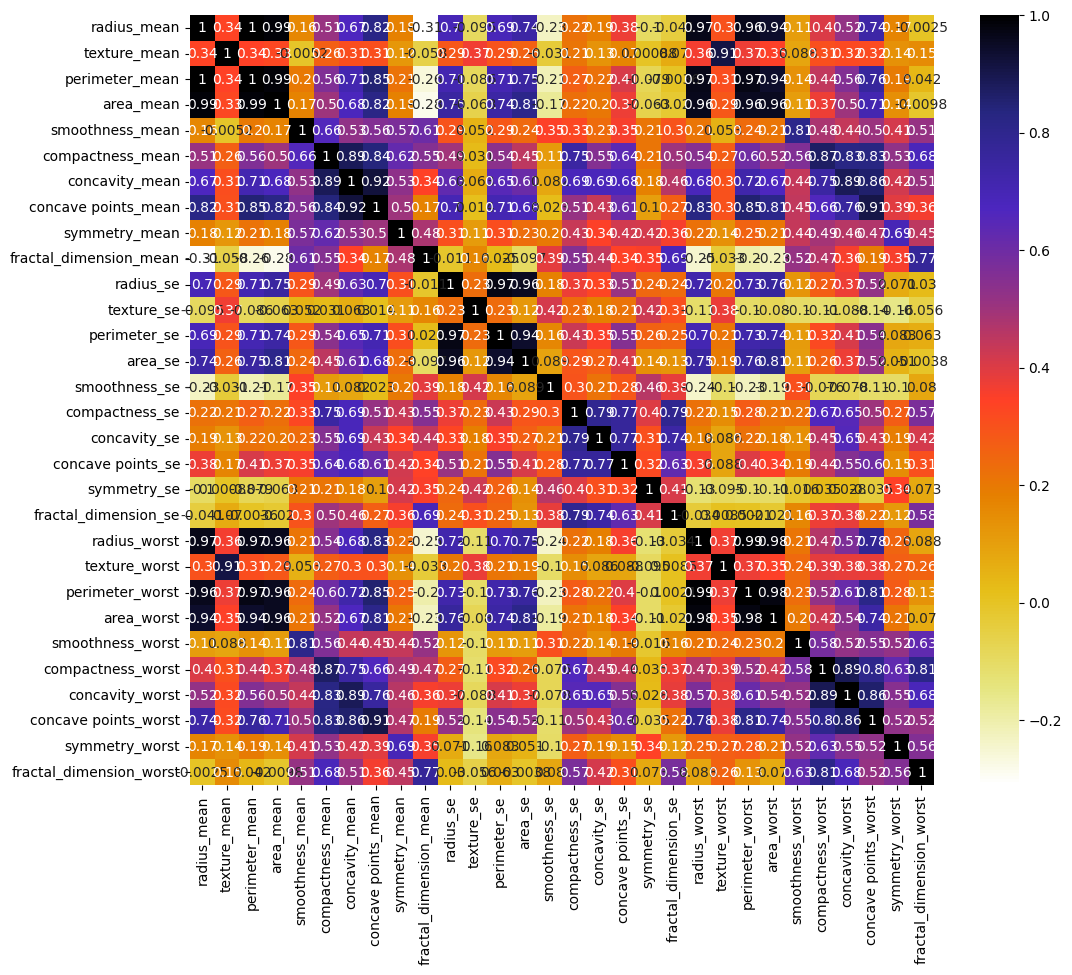

In [234]:
plt.figure(figsize=(12, 10))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

The description text file points out some attributes to be dependent on each other and here also some high correlations can be seen as expceted.

In [235]:
correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.8:
            correlated_features.add(corr_matrix.columns[i])

# checking correlated features
correlated_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

Here all the correlated features are listed, correlated pairs being identified using a treshold of 80%.

In [236]:
train.drop(correlated_features, axis=1, inplace=True)
test.drop(correlated_features, axis=1, inplace=True)
print(f'# of features in train data: {train.shape[1]}')
print(f'# of features in test data: {test.shape[1]}')

# of features in train data: 16
# of features in test data: 16


After dropping the correlated features, we are left with 16 attributes.

In [237]:
X_train = train.drop('diagnosis', axis=1)
X_test = test.drop('diagnosis', axis=1)
y_train = train['diagnosis']
y_test = test['diagnosis']

Here the train and test sets are each splitted to $X$ and $y$ components.

In [238]:
y_train = y_train.apply(lambda x: 0 if x == 'B' else 1)
y_test = y_test.apply(lambda x: 0 if x == 'B' else 1)

Benign breast diagnosis is denoted by 0 and malignant by 1.

In [239]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

The data is scaled.

# Building the Model

In [240]:
models = []

for i in range(4):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(units=X_train_scaled.shape[1], input_shape=(X_train_scaled.shape[1],), name='InputLayer'))
    model.add(tf.keras.layers.Dense(16, activation='relu', name='HiddenLayer1'))
    model.add(tf.keras.layers.Dense(32, activation='relu', name='HiddenLayer2'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='OutputLayer'))

    models.append(model)

We build the MLP which has the following characteristics:
* The input layer has 15 neurons and it has the same number of neurons as the input attributes.
* There are two hidden layers, the first one having 16 neurons and the second having 32, and the activation function for both is ReLU.
* The last layer is the output layer and has only one neuron (since the task is binary classification) and the activation is sigmoid.
There are 18 features in our modified dataset and so the input shape is (18,) and the output shape is (1,).

To evaluate the model, four instances of the same model are created in an array, `models`. `models[i]` is the model compiled and fit in the (`i` + 1)th training below.

In [241]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 15)                240       
                                                                 
 HiddenLayer1 (Dense)        (None, 16)                256       
                                                                 
 HiddenLayer2 (Dense)        (None, 32)                544       
                                                                 
 OutputLayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


A brief summary of the general model is also provided here.

# Training the Model

## First Training (lower learning rate, lower epoch)

In [242]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
models[0].compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
models[0].fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)
models[0].evaluate(X_test_scaled, y_test)

Epoch 1/10
12/12 [==============================] - 2s 22ms/step - loss: 0.6794 - accuracy: 0.5962 - val_loss: 0.6041 - val_accuracy: 0.7582
Epoch 2/10
12/12 [==============================] - 0s 7ms/step - loss: 0.5654 - accuracy: 0.7912 - val_loss: 0.5492 - val_accuracy: 0.7582
Epoch 3/10
12/12 [==============================] - 0s 7ms/step - loss: 0.4877 - accuracy: 0.8489 - val_loss: 0.4976 - val_accuracy: 0.7692
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 0.4176 - accuracy: 0.8626 - val_loss: 0.4484 - val_accuracy: 0.7912
Epoch 5/10
12/12 [==============================] - 0s 7ms/step - loss: 0.3586 - accuracy: 0.8901 - val_loss: 0.3973 - val_accuracy: 0.8462
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.3054 - accuracy: 0.9066 - val_loss: 0.3460 - val_accuracy: 0.8681
Epoch 7/10
12/12 [==============================] - 0s 7ms/step - loss: 0.2621 - accuracy: 0.9231 - val_loss: 0.2961 - val_accuracy: 0.8791
Epoch 8/10
12/12 [=

[0.1963844746351242, 0.9561403393745422]

Here the learning rate is too low, and even after 10 epochs we are not sure if the optimal solution is found or a suboptimal solution. This is because it takes longer with a low learning rate to reach the optimal solution. However a good accuracy, i.e. 95.6% is achieved.

## Second Training (higher learning rate, lower epoch)

In [243]:
opt = tf.keras.optimizers.Adam(learning_rate=1.2)
models[1].compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
models[1].fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)
models[1].evaluate(X_test_scaled, y_test)

Epoch 1/10
12/12 [==============================] - 2s 31ms/step - loss: 589.7349 - accuracy: 0.6016 - val_loss: 16.6381 - val_accuracy: 0.5824
Epoch 2/10
12/12 [==============================] - 0s 9ms/step - loss: 37.6225 - accuracy: 0.5769 - val_loss: 0.6851 - val_accuracy: 0.4396
Epoch 3/10
12/12 [==============================] - 0s 13ms/step - loss: 0.8044 - accuracy: 0.5797 - val_loss: 0.6779 - val_accuracy: 0.5934
Epoch 4/10
12/12 [==============================] - 0s 28ms/step - loss: 0.7209 - accuracy: 0.4615 - val_loss: 0.6773 - val_accuracy: 0.5934
Epoch 5/10
12/12 [==============================] - 0s 23ms/step - loss: 0.6742 - accuracy: 0.5989 - val_loss: 0.6755 - val_accuracy: 0.5934
Epoch 6/10
12/12 [==============================] - 0s 17ms/step - loss: 0.6699 - accuracy: 0.5989 - val_loss: 0.6703 - val_accuracy: 0.5934
Epoch 7/10
12/12 [==============================] - 0s 11ms/step - loss: 0.6732 - accuracy: 0.5989 - val_loss: 0.6776 - val_accuracy: 0.5934
Epoch 8/10

[0.7264553308486938, 0.2631579041481018]

Here the learning rate is too high, and so the algorithm diverges, and it gets further away from the optimal point. An alternating pattern can also be seen in the values of accuracy in each epoch. Finally a very bad accuracy, i.e. 26.3% is achieved.

## Third Training (lower learning rate, higher epoch)

In [244]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
models[2].compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
models[2].fit(X_train_scaled, y_train, epochs=60, validation_split=0.2)
models[2].evaluate(X_test_scaled, y_test)

Epoch 1/60
12/12 [==============================] - 2s 33ms/step - loss: 0.6973 - accuracy: 0.5659 - val_loss: 0.6436 - val_accuracy: 0.6703
Epoch 2/60
12/12 [==============================] - 0s 9ms/step - loss: 0.6157 - accuracy: 0.7665 - val_loss: 0.5829 - val_accuracy: 0.8022
Epoch 3/60
12/12 [==============================] - 0s 9ms/step - loss: 0.5394 - accuracy: 0.8599 - val_loss: 0.5205 - val_accuracy: 0.8242
Epoch 4/60
12/12 [==============================] - 0s 9ms/step - loss: 0.4597 - accuracy: 0.8901 - val_loss: 0.4502 - val_accuracy: 0.8352
Epoch 5/60
12/12 [==============================] - 0s 15ms/step - loss: 0.3731 - accuracy: 0.9203 - val_loss: 0.3805 - val_accuracy: 0.9011
Epoch 6/60
12/12 [==============================] - 0s 9ms/step - loss: 0.2977 - accuracy: 0.9313 - val_loss: 0.3180 - val_accuracy: 0.9121
Epoch 7/60
12/12 [==============================] - 0s 11ms/step - loss: 0.2386 - accuracy: 0.9451 - val_loss: 0.2658 - val_accuracy: 0.9121
Epoch 8/60
12/12 

[0.12195083498954773, 0.9473684430122375]

Using a higher number of epochs while keeping the learning rate low proves our hypothesis from first training; it takes a long time to converge to the optimal solution (about 54 epochs when we ran the code) and the obtained accuracy is so high, being 94.7%, but not as high as the first model.

## Fourth Training (higher learning rate, higher epoch)

In [245]:
opt = tf.keras.optimizers.Adam(learning_rate=1.2)
models[3].compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
models[3].fit(X_train_scaled, y_train, epochs=60, validation_split=0.2)
models[3].evaluate(X_test_scaled, y_test)

Epoch 1/60
12/12 [==============================] - 3s 46ms/step - loss: 923.3800 - accuracy: 0.6621 - val_loss: 346.4141 - val_accuracy: 0.8022
Epoch 2/60
12/12 [==============================] - 0s 9ms/step - loss: 241.4260 - accuracy: 0.8022 - val_loss: 215.6846 - val_accuracy: 0.5934
Epoch 3/60
12/12 [==============================] - 0s 10ms/step - loss: 83.2869 - accuracy: 0.6099 - val_loss: 0.4911 - val_accuracy: 0.7802
Epoch 4/60
12/12 [==============================] - 0s 10ms/step - loss: 0.8766 - accuracy: 0.6593 - val_loss: 0.5822 - val_accuracy: 0.5934
Epoch 5/60
12/12 [==============================] - 0s 12ms/step - loss: 0.7802 - accuracy: 0.5989 - val_loss: 0.6404 - val_accuracy: 0.5385
Epoch 6/60
12/12 [==============================] - 0s 18ms/step - loss: 0.6578 - accuracy: 0.5357 - val_loss: 0.6413 - val_accuracy: 0.5934
Epoch 7/60
12/12 [==============================] - 0s 13ms/step - loss: 0.6123 - accuracy: 0.5577 - val_loss: 0.6108 - val_accuracy: 0.5275
Epoch

[0.5534430146217346, 0.7456140518188477]

Using higher epochs while keeping the learning rate high as well just shows the jumping of the algorithm much better. The alternating pattern can still be seen and the obtained accuracy is not optimal at all, however much better than the second model, being around 75%.

# Evaluating the Best Model

The best model is the first model, i.e. `models[0]`, which is obtained using a lower learning rate and a lower epoch. Here we evaluate this model and analyze it further.

In [250]:
predictions = models[0].predict(X_test_scaled)
predictions

4/4 [==============================] - 0s 4ms/step


array([[8.06614161e-01],
       [2.44202483e-02],
       [2.09509671e-01],
       [5.36278151e-02],
       [3.17403860e-02],
       [7.78572559e-02],
       [7.46482909e-02],
       [4.11311001e-01],
       [4.68552634e-02],
       [4.46588024e-02],
       [9.32915688e-01],
       [9.88912940e-01],
       [9.90129828e-01],
       [3.07165027e-01],
       [7.75015131e-02],
       [1.13556311e-01],
       [9.65651751e-01],
       [9.98058796e-01],
       [1.20625436e-01],
       [1.04828775e-02],
       [5.37725873e-02],
       [5.58077358e-02],
       [9.42580938e-01],
       [7.63830617e-02],
       [5.41325286e-03],
       [2.69504011e-01],
       [3.29077505e-02],
       [1.73717495e-02],
       [1.84129864e-01],
       [3.92668471e-02],
       [3.56706232e-02],
       [6.85729086e-02],
       [3.07189841e-02],
       [4.31980640e-02],
       [2.53676921e-02],
       [2.14447111e-01],
       [2.27292091e-01],
       [1.14428274e-01],
       [4.47076047e-03],
       [2.34418467e-01],


Predictions are made on the test data using the first model.

In [251]:
y_pred = (predictions >= 0.5).astype(int)
y_pred

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

Interpreting results of predictions as probabilities, they are converted to 1's and 0's using a threshold of 50%.

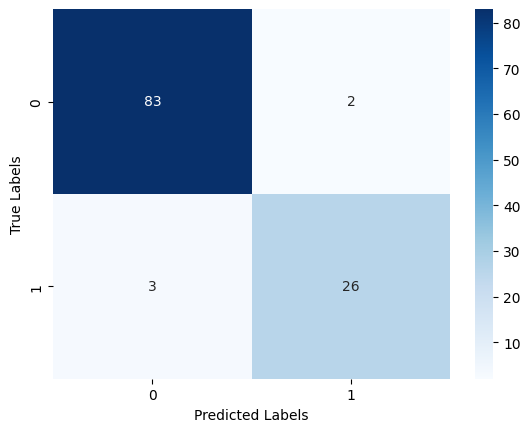

In [252]:
# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix is plotted. The true labes seem to be predicted truly accurate and precise, as 83 and 26 are much higher than 2 and 3.

In [253]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        85
           1       0.93      0.90      0.91        29

    accuracy                           0.96       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.96      0.96      0.96       114



Precision for both labels is so high, being above 90%. This means when the model labels a specific record, then we can be pretty sure it has correctly labeled the record. In other words from all the records labeled a specific label, we can be more than 90% sure its true label is the same as the predicted label.

High recall for both labels means from all the labels that are 0(or 1), we can be pretty sure the model will predict them correctly.

Having a high f1-score also proves that the model works perfectly considering both the precision and recall together.